In [145]:
import sys

# Scikit-Learn ≥0.20 is required
import sklearn



# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras

IS_COLAB=0
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir
from PIL import Image,ImageOps

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# h=250,w=250 me vo custom optimizer me it was giving 75% accuracy
# giving nice when height and width=180
height=200
width=200

In [146]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Data loading and visualising

In [147]:
def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

In [148]:
train_path = "./Pneumonia/pneumonia/chest_xray/train"

In [149]:
train_set1 = {}
dirPen = []

In [150]:
# directory for current folder
#         print(root,"/",directory,"/",files)
def getData(generator_path,path):
    res_set={}
    for root, directories, files in generator_path:
        for directory in directories:
    #         dirPen.append(directory)
    #         for d in dirPen:
            print("for directory",directory)
            for filename in os.listdir(path+"/"+directory):
    #                 print(os.path.join(d, filename))
                if directory not in res_set.keys():
                    res_set[directory] = []
                    res_set[directory].append(filename)
    #                 print(train_set)
                else:
                    res_set[directory].append(filename)
    return res_set

In [151]:
path = os.walk("./Pneumonia/pneumonia/chest_xray/train")
train_set={}
train_set=getData(path,train_path)
# train_set

for directory NORMAL
for directory PNEUMONIA


In [152]:
def seeFiles(dic):
    for k in dic.keys():
        print("{}".format(k),len(dic[k]))

In [153]:
seeFiles(train_set)

NORMAL 1341
PNEUMONIA 3875


In [154]:
train_x_list=[]
train_y_list=[]
for k,v in train_set.items():
    for file in v:
        img_dir = train_path+"/"+ k +"/"+file
#         print("img_dir",img_dir)
        img= Image.open(img_dir)
        new_img=img.resize((height, width))
        gry_img=ImageOps.grayscale(new_img)
#         print(gry_img.size)
        np_img=np.array(gry_img)
        train_x_list.append(np_img)
        if k=='NORMAL':
            train_y_list.append(0)
        else:
            train_y_list.append(1)

In [155]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [156]:
print(len(train_x_list))

5216


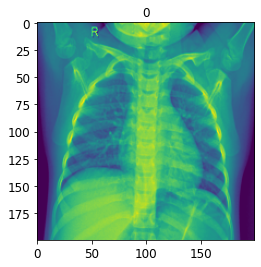

In [157]:
imgplot = plt.imshow(train_x_list[23])
plt.title(train_y_list[23])
plt.show()
# 0 means Normal, as defined in above loop when making list of all train data.

In [158]:
# for l in train_x_list:
#     print(l.shape)

In [159]:
train_x = np.array(train_x_list)
train_y = np.array(train_y_list,dtype=np.uint8)

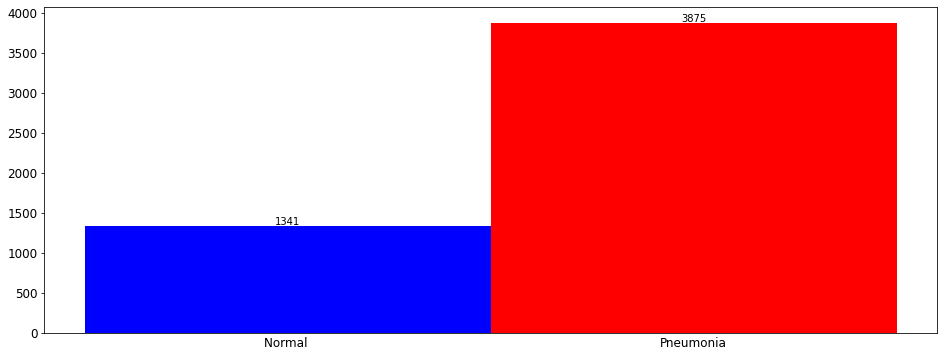

In [160]:
fig, ax = plt.subplots(1, figsize=(16,6))
n,bins,patches=plt.hist(train_y,bins=[0,1,2])
plt.xticks(bins)
# plt.grid(color='white', lw = 0.8, axis='x')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "Normal "if idx!=1 else "Pneumonia" for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

for i in range(0,1):
    patches[i].set_facecolor('b')
for i in range(1,2):    
    patches[i].set_facecolor('r')
ax.tick_params(axis='x', which='both',length=0)
# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center')
plt.show()

In [161]:
train_y

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [162]:
test_path_generator = os.walk("./Pneumonia/pneumonia/chest_xray/test")
test_path="./Pneumonia/pneumonia/chest_xray/test"
test_set={}
test_set=getData(test_path_generator,test_path)
valid_path_generator = os.walk("./Pneumonia/pneumonia/chest_xray/val")
v_path="./Pneumonia/pneumonia/chest_xray/val"
valid_set={}
valid_set=getData(valid_path_generator,v_path)

for directory NORMAL
for directory PNEUMONIA
for directory NORMAL
for directory PNEUMONIA


In [163]:
def resize_and_combine(dic,path):
    x_list=[]
    y_list=[]
    for k,v in dic.items():
        for file in v:
            img_dir = path+"/"+ k +"/"+file
    #         print("img_dir",img_dir)
            img= Image.open(img_dir)
            new_img=img.resize((height, width))
            gry_img=ImageOps.grayscale(new_img)
    #         print(gry_img.size)
            np_img=np.array(gry_img)
            x_list.append(np_img)
            if k=='NORMAL':
                y_list.append(0)
            else:
                y_list.append(1)
    return x_list,y_list

In [164]:
seeFiles(valid_set)
seeFiles(test_set)

NORMAL 8
PNEUMONIA 8
NORMAL 234
PNEUMONIA 390


In [165]:
test_x_list,test_y_list = resize_and_combine(test_set,test_path)
valid_x_list,valid_y_list = resize_and_combine(valid_set,v_path)

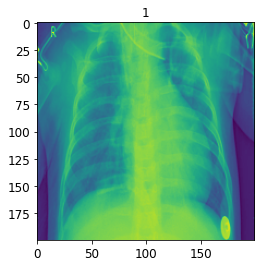

In [166]:
imgplot = plt.imshow(test_x_list[295])
plt.title(test_y_list[295])
plt.show()
# 1 means peneumonia

### Normalizing and reshaping

In [167]:
test_x = np.array(test_x_list)
test_y = np.array(test_y_list,dtype=np.uint8)
valid_x = np.array(valid_x_list)
valid_y = np.array(valid_y_list,dtype=np.uint8)

In [168]:
X_mean = train_x.mean(axis=0, keepdims=True)
X_std = train_x.std(axis=0, keepdims=True) + 1e-7
# -----------NOTICE haven't touched y since its not requied to normalize it ofcourse
train_x = (train_x - X_mean) / X_std
valid_x = (valid_x - X_mean) / X_std
test_x = (test_x - X_mean) / X_std

In [169]:
#Add an extra dimension for channels and compatibility to tools
X_train = train_x[..., np.newaxis]
X_valid = valid_x[..., np.newaxis]
X_test = test_x[..., np.newaxis]

In [170]:
print("shape of train",X_train[0].shape,X_train.shape)
print("shape of valid",X_valid[0].shape,X_valid.shape)
print("shape of test",X_test[0].shape,X_test.shape)

shape of train (200, 200, 1) (5216, 200, 200, 1)
shape of valid (200, 200, 1) (16, 200, 200, 1)
shape of test (200, 200, 1) (624, 200, 200, 1)


In [171]:
X_train_shuf,Y_train_shuf = unison_shuffled_copies(X_train,train_y)
X_test_shuf,Y_test_shuf = unison_shuffled_copies(X_test,test_y)
X_valid_shuf,Y_valid_shuf = unison_shuffled_copies(X_valid,valid_y)

In [172]:
# n,bins,patches=plt.hist(Y_train_shuf,bins=[0,1,2])
# plt.xticks(bins)
# plt.grid(color='white', lw = 0.8, axis='x')
# plt.show()

In [173]:
# this shape change was needed when changed last layer activation function from softmax to sigmoid.
# so when using softmax in last layer , use  Y_train_shuf. otherwise use X_train_shuf, y_train1. **okay this is not needed**
y_train1 = Y_train_shuf[..., np.newaxis]
y_test1 = Y_test_shuf[..., np.newaxis]

In [174]:
Y_train_shuf
print(y_train1.shape)
print(y_test1.shape)

(5216, 1)
(624, 1)


In [175]:
# del X_train
# del train_y
# del X_test
# del test_y
# del train_x
# del test_x
# del train_set

In [176]:
# Cobining X,Y train and test to get better split and testing of accuracy.
from sklearn.model_selection import train_test_split

val_split = 0.20
comb_trainX=np.concatenate([X_train_shuf,X_test_shuf])
comb_trainY=np.concatenate([Y_train_shuf,Y_test_shuf])
print(comb_trainX.shape)
print(comb_trainY.shape)

X_train_sp, X_test, y_train_sp, y_test = train_test_split(comb_trainX, comb_trainY, test_size=val_split, stratify=comb_trainY)
X_train, X_val, y_train, y_val = train_test_split(X_train_sp, y_train_sp, test_size=val_split, stratify=y_train_sp)


X = np.concatenate((X_train, X_val))
y = np.concatenate((y_train, y_val))
# now if using this to get better split of train, test and , split data then use X otherwise use X_train_shuf

(5840, 200, 200, 1)
(5840,)


In [177]:
print(X_train_shuf.shape)
print(Y_train_shuf.shape)

(5216, 200, 200, 1)
(5216,)


In [178]:
# import imblearn
# oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X_train_shuf, Y_train_shuf)

### Data augmentation

In [179]:
# Data Augmentation since we have quite less and unbalanced dataset(i know even after this data will be unbalanced).
# validation_split: Optional float between 0 and 1, fraction of data to reserve for validation.
# subset: One of "training" or "validation". Only used if validation_split is set.
# Augmentation options using:
#  rotation range=90.
#  zoom augmentaion : . A zoom less than 1.0 magnifies the image, while a zoom greater than 1.0 zooms out of the image.
#  height/width shift: The width_shift_range is a floating point number between 0.0 and 1.0 which specifies the upper bound of the fraction of the total width by which the image is to be randomly shifted, either towards the left or right.
#  horizontal flip
#  shearing- it slants the shape of the image.
# using validation_split so it is using some part of data separate for validation which can be accessed in flow using subset='validation'.
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=90,
    zoom_range=[0.5, 1.5],
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
    shear_range=45.0)
# datagen.fit(X_train_shuf)
datagen.fit(X)

In [180]:
# from imblearn.over_sampling import RandomOverSampler,SMOTE
# from imblearn.keras import balanced_batch_generator
# bgen = BalancedDataGenerator(X_train_shuf, Y_train_shuf, datagen, batch_size=32)
# steps_per_epoch = bgen.steps_per_epoch
# print(train_x.shape)
# X_over, y_over = oversample.fit_resample(train_x, train_y)

In [181]:
# see_data=datagen.flow(X, y, batch_size=32,subset='training',shuffle=True)
# see_data

### Modelling and training

In [182]:
from functools import partial


DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=3, input_shape=[height, width, 1]), #Based on input size
    keras.layers.MaxPooling2D(pool_size=2), #Same maxpooling applied regularly
    DefaultConv2D(filters=128),  
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(units=1, activation='sigmoid'),
#     keras.layers.Dense(units=2, activation='softmax'),
])

In [183]:
# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
# history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
# loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

In [184]:
nadamOptimizer=keras.optimizers.Nadam(
    learning_rate=0.0002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00009)
# model.fit(X_train, Y_train, callbacks=[reduce_lr])
model.compile(loss="binary_crossentropy", optimizer=nadamOptimizer, metrics=[keras.metrics.SensitivityAtSpecificity(0.5),
f1_m,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
# only do an sensitivityAtspecificity(0.5) or 0.8 and remove f1_m,precision_m,recall_m
# or only do sensitivityAtspecificity and f1 score. make sure left bottom part of confusion matrix is low(false negatives)
# should be low.
# tf.keras.metrics.FalseNegatives(thresholds=None, name=None, dtype=None)
# tf.keras.metrics.Precision()
# tf.keras.metrics.Recall()
# model.compile(loss="binary_crossentropy", optimizer=nadamOptimizer, metrics=["accuracy"])

# put activation of last layer to sigmoid/softmax
# model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# try increasing learning rate now , see default learning rate of nadam and then increase it.
# optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9, nesterov=True)
# model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# history = model.fit(X_train_shuf, Y_train_shuf, epochs=7, validation_data=(X_valid_shuf, Y_valid_shuf))
# this below one is best keep it if want to save and give.
# According to softmax function.
# history = model.fit(datagen.flow(X_train_shuf, Y_train_shuf,batch_size=32, subset='training'), epochs=40, 
#                     validation_data=datagen.flow(X_train_shuf, Y_train_shuf, subset='validation'))

#  according to sigmoid function.
# history = model.fit(datagen.flow(X_train_shuf, y_train1,batch_size=32, subset='training'), epochs=6,
#                     validation_data=datagen.flow(X_train_shuf, y_train1, subset='validation'),callbacks=[reduce_lr])

# For combined train and test data which is splitted in train test and val
history = model.fit(datagen.flow(X, y,batch_size=32, subset='training'), epochs=25,
                    validation_data=datagen.flow(X, y, subset='validation'),callbacks=[reduce_lr])

# change this below line accordinly how many metrics i pass in model.+1 for loss.
loss,scoreSensitivityATspecificity,f1_score,precision,recall= model.evaluate(X_test, y_test)

Epoch 1/25
117/117 [==============================] - 42s 295ms/step - loss: 0.6075 - sensitivity_at_specificity_2: 0.6060 - f1_m: 0.8407 - precision_2: 0.7515 - recall_2: 0.9599 - val_loss: 0.4239 - val_sensitivity_at_specificity_2: 0.9449 - val_f1_m: 0.8803 - val_precision_2: 0.8192 - val_recall_2: 0.9509
Epoch 2/25
117/117 [==============================] - 36s 305ms/step - loss: 0.4449 - sensitivity_at_specificity_2: 0.8991 - f1_m: 0.8557 - precision_2: 0.7836 - recall_2: 0.9500 - val_loss: 0.3693 - val_sensitivity_at_specificity_2: 0.9494 - val_f1_m: 0.8887 - val_precision_2: 0.8925 - val_recall_2: 0.8899
Epoch 3/25
117/117 [==============================] - 37s 319ms/step - loss: 0.3843 - sensitivity_at_specificity_2: 0.9163 - f1_m: 0.8718 - precision_2: 0.8392 - recall_2: 0.9159 - val_loss: 0.3526 - val_sensitivity_at_specificity_2: 0.9360 - val_f1_m: 0.8956 - val_precision_2: 0.9019 - val_recall_2: 0.9033
Epoch 4/25
117/117 [==============================] - 39s 333ms/step - lo

In [185]:
# print(model.evaluate(X_test, y_test))
print("loss:",loss)
print("sensitivityAtSpecificity:",scoreSensitivityATspecificity)
print("f1 score:",f1_score)
print("precision:",precision)
print("Recall:",recall)

loss: 0.238984152674675
sensitivityAtSpecificity: 0.9871043562889099
f1 score: 0.9342626333236694
precision: 0.9686324000358582
Recall: 0.9050410389900208


In [186]:
validation_data=datagen.flow(X_train_shuf, Y_train_shuf, subset='validation')
validation_data

In [187]:
training_data=datagen.flow(X_train_shuf, Y_train_shuf, subset='training')

In [188]:
print(X_train_shuf.shape,Y_train_shuf.shape)
print(X_test_shuf.shape,Y_test_shuf.shape)
print(X_valid_shuf.shape,Y_valid_shuf.shape)
# X_test_shuf, Y_test_shuf
# X_valid_shuf, Y_valid_shuf

(5216, 200, 200, 1) (5216,)
(624, 200, 200, 1) (624,)
(16, 200, 200, 1) (16,)


In [189]:
print(loss,scoreSensitivityATspecificity,f1_score)

0.238984152674675 0.9871043562889099 0.9342626333236694


In [190]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 64)      640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 256)       295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 160000)           

In [191]:
# plt.hist(Y_train_shuf,bins=[0,1])
# plt.show()
# Just testing if shuffling and all did't mess up anything.
# fig, ax = plt.subplots(1, figsize=(16,6))
# n,bins,patches=plt.hist(Y_train_shuf,bins=[0,1,2])
# plt.xticks(bins)
# # plt.grid(color='white', lw = 0.8, axis='x')
# xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
# xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
# xticks_labels = [ "Normal "if idx!=1 else "Pneumonia" for idx, value in enumerate(bins[:-1])]
# plt.xticks(xticks, labels = xticks_labels)
# for i in range(0,1):
#     patches[i].set_facecolor('b')
# for i in range(1,2):    
#     patches[i].set_facecolor('r')

# ax.tick_params(axis='x', which='both',length=0)
# # plot values on top of bars
# for idx, value in enumerate(n):
#     if value > 0:
#         plt.text(xticks[idx], value+5, int(value), ha='center')
# plt.show()


In [192]:
y_pred=model.predict(X_valid_shuf)

In [193]:
print(y_pred.shape)

(16, 1)


In [194]:
# y_valid1 = Y_valid_shuf[..., np.newaxis]

In [195]:
# y_predTest = model.predict(X_test_shuf)
y_predTest = model.predict(X_test)

In [196]:
# print(y_pred)
print("Testing with data of validation directory which are't touched by model.")
print ("Predicted",np.argmax(y_pred, axis=1))
# print(y_pred)
y_predTest23=np.array([1 if y>0.5 else 0 for y in y_predTest ])

y_pred23=np.array([1 if y>0.8 else 0 for y in y_pred ])
print("Predicted",y_pred23)
print("Actual   ",Y_valid_shuf)

Testing with data of validation directory which are't touched by model.
Predicted [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted [1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0]
Actual    [1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0]


In [197]:
classes=[0,1]
cols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [198]:
print(history.history.keys())

dict_keys(['loss', 'sensitivity_at_specificity_2', 'f1_m', 'precision_2', 'recall_2', 'val_loss', 'val_sensitivity_at_specificity_2', 'val_f1_m', 'val_precision_2', 'val_recall_2', 'lr'])


In [202]:
print(len(history.history['loss']),len(history.history['val_loss']))
# history.history['sensitivity_at_specificity']
print(history.history['lr'])
epochs_range=26
# epochs +1 as its value

25 25
[0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002]


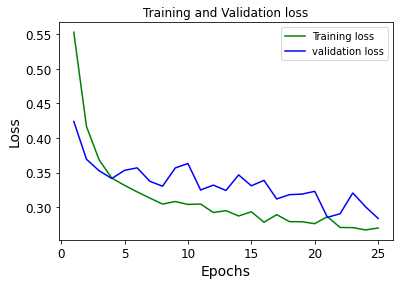

In [203]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epochs_range)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

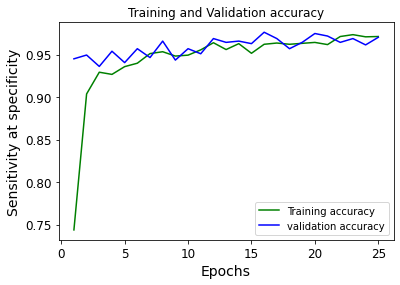

In [204]:
loss_train = history.history['sensitivity_at_specificity_2']
loss_val = history.history['val_sensitivity_at_specificity_2']
epochs = range(1,epochs_range)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Sensitivity at specificity')
plt.legend()
plt.show()

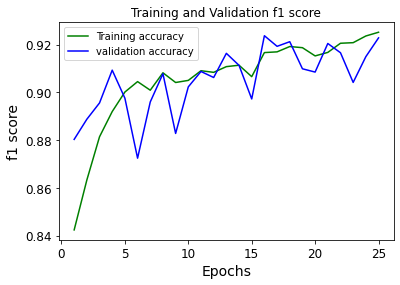

In [205]:
loss_train = history.history['f1_m']
loss_val = history.history['val_f1_m']
epochs = range(1,epochs_range)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation f1 score')
plt.xlabel('Epochs')
plt.ylabel('f1 score')
plt.legend()
plt.show()

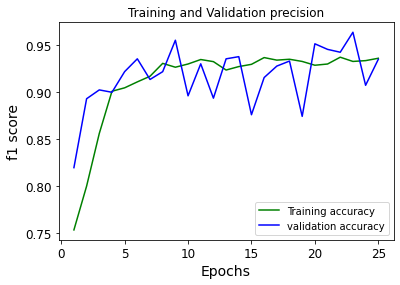

In [206]:
loss_train = history.history['precision_2']
loss_val = history.history['val_precision_2']
epochs = range(1,epochs_range)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('f1 score')
plt.legend()
plt.show()

In [207]:
# # y_pred=model.predict_classes(test_images)
# y_pred_classes=model.predict_classes(X_valid_shuf)
# con_mat = tf.math.confusion_matrix(labels=Y_valid_shuf, predictions=y_pred_classes).numpy()
# con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
# con_mat_df = pd.DataFrame(con_mat_norm,
#                      index = classes, 
#                      columns = classes)

from sklearn import metrics
# matrix_valid = sklearn.metrics.confusion_matrix(Y_valid_shuf, y_pred.argmax(axis=1))
matrix_valid = sklearn.metrics.confusion_matrix(Y_valid_shuf, y_pred23)
print("Confusion matrix on validation img")
print(matrix_valid)
total_valid = matrix_valid[0][0]+matrix_valid[0][1]+matrix_valid[1][0]+matrix_valid[1][1]
accuracy_on_valid= (matrix_valid[0][0] + matrix_valid[1][1])/total_valid
print("accuracy on valid",accuracy_on_valid)
y_pred_test=model.predict(X_test_shuf)
# matrix_test = sklearn.metrics.confusion_matrix(Y_test_shuf, y_pred_test.argmax(axis=1))
# for unsplitted variables.
# matrix_test = sklearn.metrics.confusion_matrix(Y_test_shuf, y_predTest23)
# for pslitted variables
matrix_test = sklearn.metrics.confusion_matrix(y_test, y_predTest23)

print("confusion matrix on testing img")
print(matrix_test)
total_test = matrix_test[0][0]+matrix_test[0][1]+matrix_test[1][0]+matrix_test[1][1]
accuracy_on_test= (matrix_test[0][0] + matrix_test[1][1])/total_test
print("accuracy on validation set",accuracy_on_test)

Confusion matrix on validation img
[[6 2]
 [2 6]]
accuracy on valid 0.75
confusion matrix on testing img
[[290  25]
 [ 81 772]]
accuracy on validation set 0.9092465753424658


<Figure size 576x576 with 0 Axes>

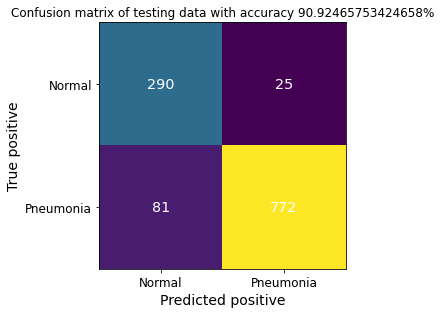

In [208]:
# import sns
plot_fig=matrix_test
figure = plt.figure(figsize=(8, 8))
# sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
fig, ax = plt.subplots()
# im = ax.imshow(con_mat_df)
im = ax.imshow(plot_fig)
label=["Normal","Pneumonia"]
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(label)
ax.set_yticklabels(label)
for i in range(len(classes)):
    for j in range(len(label)):
        text = ax.text(j, i, plot_fig[i][j],
                       ha="center", va="center", color="w",size="x-large")
plt.tight_layout()
plt.title("Confusion matrix of testing data with accuracy {}%".format(accuracy_on_test*100))
plt.ylabel('True positive')
plt.xlabel('Predicted positive')
plt.show()

In [209]:
#grayscale- https://appdividend.com/2020/06/22/how-to-convert-pil-image-to-grayscale-in-python/#:~:text=To%20convert%20PIL%20Image%20to%20Grayscale%20in%20Python%2C%20use%20the,has%20an%20open()%20image.
# resize image- https://auth0.com/blog/image-processing-in-python-with-pillow/
# made me realize that i had to resize image- https://stackoverflow.com/questions/4674473/valueerror-setting-an-array-element-with-a-sequence
# Data augmentation- https://stackoverflow.com/questions/48820093/how-to-incorporate-validation-data-in-kerass-datagen-flow
#                   https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/
#                  https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844
#                 https://numpy.org/devdocs/reference/arrays.dtypes.html
#                https://keras.io/api/preprocessing/image/
#              https://stackoverflow.com/questions/53842547/number-of-training-samples-for-each-class-using-imagedatagenerator-with-validati
# https://keras.io/api/optimizers/Nadam/
# Fancy plotting histogram- https://towardsdatascience.com/histograms-with-pythons-matplotlib-b8b768da9305
#                   https://stackoverflow.com/questions/49290266/python-matplotlib-histogram-specify-different-colours-for-different-bars
#To balance Data- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
#T0 balance data using imblearn balanceDatagenerator https://medium.com/analytics-vidhya/how-to-apply-data-augmentation-to-deal-with-unbalanced-datasets-in-20-lines-of-code-ada8521320c9#:~:text=To%20deal%20with%20it%2C%20we,the%20dataset%20and%20improve%20variance.&text=It%20means%20that%20if%20you,continue%20unbalanced%20after%20data%20augmentation.
# https://androidkt.com/keras-confusion-matrix-in-tensorboard/
# https://stackoverflow.com/questions/61742556/valueerror-shapes-none-1-and-none-2-are-incompatible
# Better accuracy metrics for imbalanced data- https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/